# Machine Learning Coursework 2

For coursework 2 you will be asked to train and evalute several different classifiers: Naïve Bayes classifier, Random Forest classifier, and kNN classifier using the iris dataset. You will be asked to answer a series of questions relating to each individual model and questions comparing each model. 

#### You are free to use the sklearn library. 


Notes:
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Code                                               | 7     |
| Code Report/comments                               | 6     |
| Model questions                                    | 14    |  
| Model comparision questions                        | 18    |
| Total available                                    |**45** |  

##### Remember to save your notebook as “CW2.ipynb”. It is a good idea to re-run the whole thing before saving and submitting. 










## Web References

- [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
- [sklearn.datasets.load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
- [Iris Species:100% Accuracy using Naive bayes](https://www.kaggle.com/vinayshaw/iris-species-100-accuracy-using-naive-bayes)
- [Naive Bayes Classifier with Scikit](https://python-course.eu/machine-learning/naive-bayes-classifier-with-scikit.php)
- [scikit-learn Classifiers on Iris Dataset](https://www.kaggle.com/chungyehwang/scikit-learn-classifiers-on-iris-dataset)
- [Random Forest Feature Importance Computed in 3 Ways with Python](https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=Random%20Forest%20Built-in%20Feature%20Importance&text=It%20is%20a%20set%20of,sets%20with%20similars%20responses%20within.)

## Import Libraries

In [1]:
import pandas as pd
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# set the randon seed to use for reproducibility
random_state = 1337

# the fraction of the data to use for testing
test_frac = 0.5

## 1. Classifiers [7 marks total]
Code and train your three classifiers in the cells below the corresponding header. You do not need to implement cross-validation in this coursework, simply fit the data. You are free to use sklearn and other packages where necessary.  



In [3]:
# import datasets
from sklearn import datasets 

# load data
iris = datasets.load_iris() # load data 
#print(iris.DESCR) # print dataset description

In [4]:
# get the predictors and target
X = iris.data
y = iris.target

In [5]:
# split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_frac, 
    stratify=y,
    random_state=random_state)

print('There are %d samples in the training set and %d samples in the test set' % (X_train.shape[0], X_test.shape[0]))

There are 75 samples in the training set and 75 samples in the test set


### a) Baseline

The Pycaret library is use in this section to establish a baseline for model performance.

> ℹ️ This section is not core the answering the coursework questions.

In [6]:
# import the pycaret dependencies
from pycaret.classification import *

In [7]:
# convert the training dataset to a dataframe
df_train = pd.DataFrame(data=X_train, columns=iris.feature_names)
df_train['target'] = pd.Series(y_train)

# convert the test data to a dataframe
df_test = pd.DataFrame(data=X_test, columns=iris.feature_names)
df_test['target'] = pd.Series(y_test)

In [8]:
# initialize the training environment and transformation pipeline
classifier = setup(
    data=df_train, 
    target='target',
    session_id=random_state,
    silent=True,
    verbose=False)

In [9]:
# train a naive bayes, random forest, and knn classification model
models = compare_models(include=['nb', 'rf', 'knn'], n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9467,0.9917,0.9500,0.9678,0.9444,0.9206,0.9317,0.3620
rf,Random Forest Classifier,0.9433,1.0000,0.9500,0.9356,0.9322,0.9194,0.9361,0.4260
knn,K Neighbors Classifier,0.9267,1.0000,0.9333,0.9544,0.9231,0.8893,0.9052,0.0130


The following section optimizes each model by using a [random grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) from the scikit-learn library.

In [10]:
# find the best hyperparameters for each model
tuned_models = [tune_model(model,search_library='scikit-learn', search_algorithm='random') for model in models]

# display the model parameters
for model in models:
    print(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,1.0000,0.8333,0.8889,0.8222,0.7500,0.7833
1,0.8333,1.0000,0.8333,0.8889,0.8222,0.7500,0.7833
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8000,1.0000,0.8333,0.8667,0.7867,0.6875,0.7350
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


GaussianNB(priors=None, var_smoothing=1e-09)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1337, verbose=0,
                       warm_start=False)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


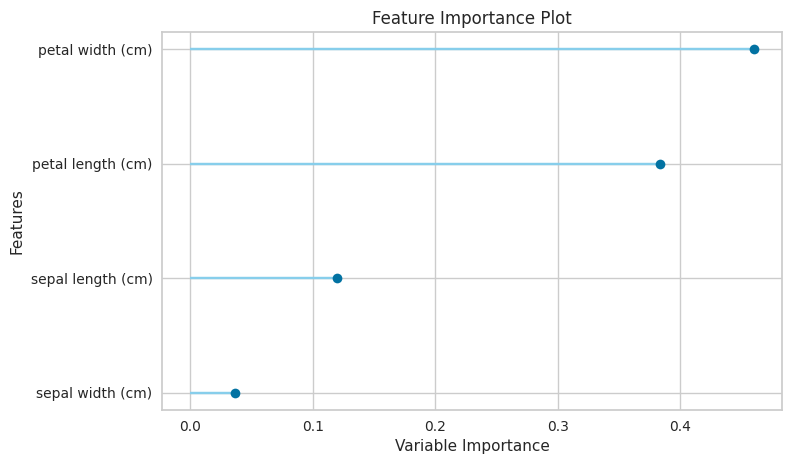

In [11]:
# show the feature importance of the random forest model
for model in models:
    if type(model).__name__ == 'RandomForestClassifier':
        plot_model(model, plot='feature')

In [12]:
# evaluate each model on the test data
for model in tuned_models:
    print('--- %s ---' % type(model))

    df_predicted = predict_model(estimator=model, data=df_test)
    print(classification_report(y_true=df_predicted.target, y_pred=df_predicted.Label))

--- <class 'sklearn.naive_bayes.GaussianNB'> ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.89      1.00      0.94        25
           2       1.00      0.88      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

--- <class 'sklearn.ensemble._forest.RandomForestClassifier'> ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.86      1.00      0.93        25
           2       1.00      0.84      0.91        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

--- <class 'sklearn.neighbors._classification.KNeighborsClassifier'> ---
              precision    recall  f1-score   supp

### b) Modeling Functions

This section contains re-usable functions to reduce the amount of repeated code.

In [13]:
class Modeler:
    """
    Modeler class to train and evaluate models.
    """
    def __init__(self, model, X_train, y_train, X_test, y_test, feature_names):
        """
        Initialize the modeler.

        Parameters
        ----------
        model : sklearn model
            The model to train and evaluate.
        X_train : numpy array
            The training data.
        y_train : numpy array
            The training labels.
        X_test : numpy array
            The test data.
        y_test : numpy array
            The test labels.
        feature_names : list
            The feature names.
        """
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_names = feature_names

    def train(self):
        """
        Train the model
        """
        self.model.fit(self.X_train, self.y_train)

    def evaluate(self):
        """
        Evaluate the model
        """
        y_predicted = self.model.predict(self.X_test)
        print(classification_report(y_true=self.y_test, y_pred=y_predicted))

    def get_feature_importance(self) -> pd.DataFrame:
        """
        Get the feature importance of the model.

        Returns
        -------
        pd.DataFrame
            The feature importance of the model.
        """
        if type(self.model).__name__ == 'RandomForestClassifier':
            return pd.DataFrame({
                'feature': self.feature_names,
                'importance': self.model.feature_importances_
            })
        else:
            print('Model does not support feature importance.')

    def get_evaluation(self) -> pd.DataFrame:
        """
        Get the evaluation of the model on the test dataset.

        Returns
        -------
        pd.DataFrame
            The evaluation of the model on the test dataset.
        """
        y_predicted = self.model.predict(self.X_test)
        return pd.DataFrame([{
            'model': type(self.model).__name__,
            'precision': precision_score(y_true=self.y_test, y_pred=y_predicted, average='weighted'),
            'recall': recall_score(y_true=self.y_test, y_pred=y_predicted, average='weighted'),
            'f1-score': f1_score(y_true=self.y_test, y_pred=y_predicted, average='weighted'),
            'accuracy': accuracy_score(y_true=self.y_test, y_pred=y_predicted)
        }])

    def get_accuracy(self) -> float:
        """
        Get the accuracy of the trained model on the test dataset.

        Returns
        -------
        float
            The accuracy of the model.
        """
        return accuracy_score(y_true=self.y_test, y_pred=self.model.predict(self.X_test))

### 1.1 Naïve Bayes Classifier [2]
Train a naïve bayes classifier in python. 

Use your code to fit the data given above. 


#### 1.1.1 Train the Naive Bayes Classifier

In [14]:
# create a new modeler
modeler_nb = Modeler(
    model=GaussianNB(), 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test,
    feature_names=iris.feature_names)

# train the model
modeler_nb.train()

In [15]:
# evaluation the model on the test set
modeler_nb.evaluate()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.89      1.00      0.94        25
           2       1.00      0.88      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



### 1.2 Random Forst Classifier [3]
Train a random forest classifier in python. Use your code to fit the data given above. 

Evaluate feature performance of the model. 

Visualise the feature importance. 


#### 1.2.1 Train a random forest classifier 

In [16]:
# create a new modeler
modeler_rf = Modeler(
    model=RandomForestClassifier(
        n_jobs=-1,
        random_state=random_state
    ), 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test,
    feature_names=iris.feature_names)

# train the model
modeler_rf.train()

In [17]:
# evaluation the model on the test set
modeler_rf.evaluate()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.89      1.00      0.94        25
           2       1.00      0.88      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



#### 1.2.2 Evaluate feature performance

The following two features have the most predictive power in the model, and by removing other features the model should produce similar results.

In [18]:
# show the importance of each feature
df_feature_importance = modeler_rf.get_feature_importance().sort_values(by='importance', ascending=False)
df_feature_importance

,feature,importance
3,petal width (cm),0.458948
2,petal length (cm),0.403974
0,sepal length (cm),0.094816
1,sepal width (cm),0.042261


In the code section below a new model is created using only the top two features. The results indicate that this mode have identical performance. 

❗️ However, in datasets as small as the iris dataset the test/train split and random seed can have a significant impact on the results, so we cannot conclude that model performance will always be exactly the same.

In [19]:
# evalute model performance with only feature 2 and 3
selected_features = [2, 3]

# create a new modeler
modeler_rf_sel = Modeler(
    model=RandomForestClassifier(
        n_jobs=-1,
        random_state=random_state
    ), 
    X_train=X_train[:, selected_features], 
    y_train=y_train, 
    X_test=X_test[:, selected_features], 
    y_test=y_test,
    feature_names=None)

# train the model
modeler_rf_sel.train()

# evaluation the model on the test set
modeler_rf_sel.evaluate()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.89      1.00      0.94        25
           2       1.00      0.88      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



#### 1.2.3 Visualise the feature importance

Text(0.5, 1.0, 'Figure 1. Feature Importance')

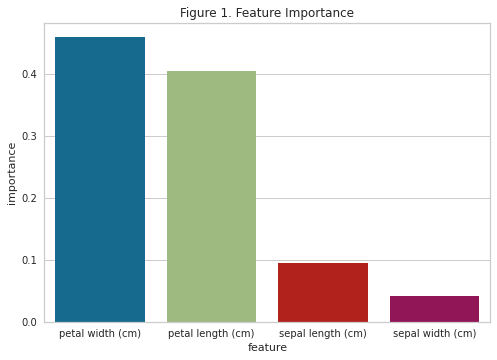

In [20]:
sns.barplot(
    data=df_feature_importance,
    x='feature',
    y='importance').set_title('Figure 1. Feature Importance')

### 1.3 kNN Classifier [2]
Train a kNN classifier in python. 

Use your code to fit the data given above. 

In [21]:
# create a new modeler
modeler_knn = Modeler(
    model=KNeighborsClassifier(n_jobs=-1), 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test,
    feature_names=iris.feature_names)

# train the model
modeler_knn.train()

In [22]:
# evaluation the model on the test set
modeler_knn.evaluate()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.93      1.00      0.96        25
           2       1.00      0.92      0.96        25

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



## 2 Code Report [6 marks total]
In a markdown box, write a short report (no more than 500 words) that describes the workings of your code. 

In [23]:
#Write your answer here

## 3 Model Questions [14 marks total]
Please answer the following questions relating to your classifiers. 

### 3.1 Naïves Bayes Questions [4]
Why do zero probabilities in our Naïve Bayes model cause problems? 

How can we avoid the problem of zero probabilities in our Naïve Bayes model? 

Please answer in the cell below.

In [24]:
#Write your answer here

# https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html#:~:text=The%20zero%2Dfrequency%20problem,all%20the%20probabilities%20are%20multiplied.

# Zero probabilities - https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

### 3.2 Random Forest Questions [6]
Which feature is the most important from your random forest classifier? 

Can any features be removed to increase accuracy of the model, if so which features? 

Explain why it would be useful to remove these features. 

Please answer in the cell below.

In [25]:
#Write your answer here

In [26]:
# create pairplot (https://www.kaggle.com/vinayshaw/iris-species-100-accuracy-using-naive-bayes) and (https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)
# and create a feature plot (https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=Random%20Forest%20Built%2Din%20Feature%20Importance&text=It%20is%20a%20set%20of,sets%20with%20similars%20responses%20within.)

#### 3.2.1 Which feature is the most important from your random forest classifier?

#### 3.2.2 Can any features be removed to increase accuracy of the model, if so which features?

#### 3.3.3 Explain why it would be useful to remove these features.

### 3.3 kNN Questions [4]
Do you think the kNN classifier is best suited to the iris dataset? 

What ideal qualities would the most appropriate dataset display?  

Please answer in the cell below.

In [27]:
#Write your answer here

#### 3.4.1 Do you think the kNN classifier is best suited to the iris dataset?

#### 3.4.2 What ideal qualities would the most appropriate dataset display?

## 4 Comparing Models [18 marks total]
Please answer the following questions comparing your classifiers.

In [28]:
# display the model metrics for the test set
pd.concat([
    modeler_nb.get_evaluation(),
    modeler_rf.get_evaluation(),
    modeler_knn.get_evaluation()
])

,model,precision,recall,f1-score,accuracy
0,GaussianNB,0.964286,0.960000,0.959855,0.960000
0,RandomForestClassifier,0.964286,0.960000,0.959855,0.960000
0,KNeighborsClassifier,0.975309,0.973333,0.973291,0.973333


### 4.1 Compare each model [3]
What differences do you see between your Naïve Bayes classifier, your random forest classifier, and your kNN classifier? 

In [29]:
#Write your answer here

### 4.2 Accuracy [6]
Can you explain why there are differences in accuracy between the three classifiers? 

In [30]:
#Write your answer here



| Algorithm     | Bias | Variance |
| ------------- | ---- | -------- |
| Naive Bayes   | High | Low      |
| Random Forest | Low  | High     |
| KNN           | Low  | High     |

https://machinelearningmastery.com/different-results-each-time-in-machine-learning/

- Variance: How sensitive the algorithm is to the specific data used during training.
- A more sensitive algorithm has a larger variance, which will result in more difference in the model, and in turn, the predictions made and evaluation of the model. Conversely, a less sensitive algorithm has a smaller variance and will result in less difference in the resulting model with different training data, and in turn, less difference in the resulting predictions and model evaluation.
 
 https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/

- Low Bias: Suggests less assumptions about the form of the target function.
- High-Bias: Suggests more assumptions about the form of the target function.
- Examples of low-bias machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.
- Examples of high-bias machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

 - Variance Error: Variance is the amount that the estimate of the target function will change if different training data was used.
 - The target function is estimated from the training data by a machine learning algorithm, so we should expect the algorithm to have some variance.
 - The k-nearest neighbors algorithm has low bias and high variance, but the trade-off can be changed by increasing the value of k which increases the number of neighbors that contribute t the prediction and in turn increases the bias of the model.

 https://www.analyticsvidhya.com/blog/2020/12/a-measure-of-bias-and-variance-an-experiment/

 - Random Forest - 	Low Bias, High Variance

 https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.579.2693&rep=rep1&type=pdf

 - High bias and low variance algorithms result in models that are more robust to changes in the training data since they are not close representations of that data.
- Naive Bayes is generally regarded as high bias and low variance because the assumptions it makes about the interactions among features have nothing to do with a particular training sample.

In [31]:
def get_random_influence(models:list, random_seeds:list, X, y, all_data:bool=False, stratify:bool=True) -> pd.DataFrame:
    """
    Experiment with the influence of the random seed on model accuracy.

    Parameters
    ----------
    models : list
        The list of models to evaluate.
    random_seeds : list
        The random seeds.
    X : numpy array
        The training data.
    y : numpy array
        The training labels.
    all_data : bool, optional
        Whether to use all the data for training and testing.
    stratify : bool, optional
        Whether to stratify the data.

    Returns
    -------
    pd.DataFrame
        A dataframe containing the experiment results.
    """

    df_random_influence = pd.DataFrame(columns=['model', 'seed', 'accuracy'])
    for random_seed in random_seeds:
        if all_data:
            # use the complete dataset for training and testing
            X_train = X
            X_test = X
            y_train = y
            y_test = y
        else:
            # create the data split using the random seed
            X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                test_size=test_frac, 
                stratify=y if stratify else None,
                random_state=random_seed)     

        # evaluate each model
        for model in models:
            if hasattr(model, 'random_state'):
                model.random_state = random_seed

            modeler = Modeler(
                model=model, 
                X_train=X_train, 
                X_test=X_test, 
                y_train=y_train, 
                y_test=y_test,
                feature_names=None)

            # train the model
            modeler.train()

            # get the model accuracy
            accuracy = modeler.get_accuracy()

            # add the model accuracy to the dataframe
            df_random_influence = df_random_influence.append(
                {
                    'model': model.__class__.__name__,
                    'seed': random_seed,
                    'accuracy': accuracy
                },
                ignore_index=True
            )

    return df_random_influence

In [32]:
# get a list of random seeds to use for the experiment
random.seed(random_state)
random_seeds = [random.randint(0,9000) for i in range(0,100)]

#random_seeds = [random_state, 43, 80085, 3000, 2000, 4000]
#random_seeds = list(range(0, 100))

# get the accuracy of the models using different random seeds
df_accuracy = get_random_influence(
    models=[modeler_nb.model, modeler_rf.model, modeler_knn.model],
    random_seeds=random_seeds,
    X=X,
    y=y,
    stratify=False)

Text(0.5, 1.0, 'Figure 2. Model Accuracy')

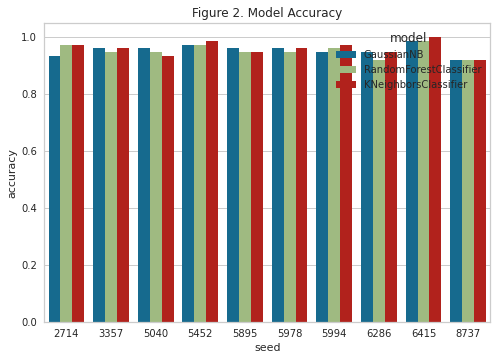

In [33]:
# plot the results
sns.barplot(
    data=df_accuracy.head(10*3),
    x='seed',
    y='accuracy',
    hue='model').set_title('Figure 2. Model Accuracy')

> ❌ Use the table below to look at the accuracy mean (bias) and standard deviation (variance) to help explain the the differences in accuracy. KNN has a low bias and high variance.

In [34]:
df_accuracy.groupby('model').describe().droplevel(axis=1, level=0).reset_index()

,model,count,mean,std,min,25%,50%,75%,max
0,GaussianNB,100.0,0.950667,0.019740,0.906667,0.933333,0.946667,0.960000,0.986667
1,KNeighborsClassifier,100.0,0.957733,0.022587,0.880000,0.946667,0.960000,0.973333,1.000000
2,RandomForestClassifier,100.0,0.945867,0.021509,0.866667,0.933333,0.946667,0.960000,0.986667


Text(0.5, 1.0, 'Figure 3. Model Accuracy - All Data')

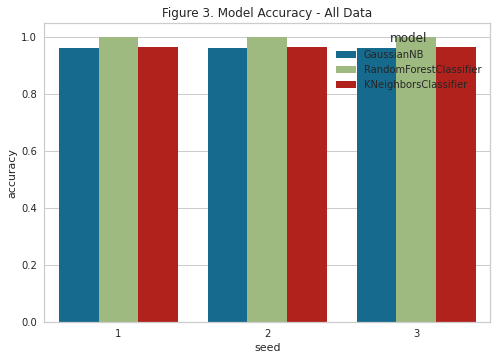

In [35]:
# get the accuracy of the models using different random seeds
df_accuracy = get_random_influence(
    models=[modeler_nb.model, modeler_rf.model, modeler_knn.model],
    random_seeds=list(range(1,4)),
    X=X,
    y=y,
    all_data=True)

# plot the results
sns.barplot(
    data=df_accuracy,
    x='seed',
    y='accuracy',
    hue='model').set_title('Figure 3. Model Accuracy - All Data')

### 4.3 Appropriate Use [9]
When would it be appropriate to use each different classifier? 

Reference real-world situations and examples of specific data sets and explain why that classifier would be most appropriate for that use-case.

In [36]:
#Write your answer here

KNN 
- https://www.ibm.com/docs/en/ias?topic=knn-usage
- https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f

Random Forest
- https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
- https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/#:~:text=Random%20Forest%20is%20suitable%20for,becomes%20more%20difficult%20to%20interpret.

Naive Bayes
- https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
- https://www.ibm.com/docs/en/ias?topic=bayes-background